In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv('82.csv')

In [20]:
wcss = []
for i in range(1, 11):  # Mencoba jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Raport']])
    wcss.append(kmeans.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

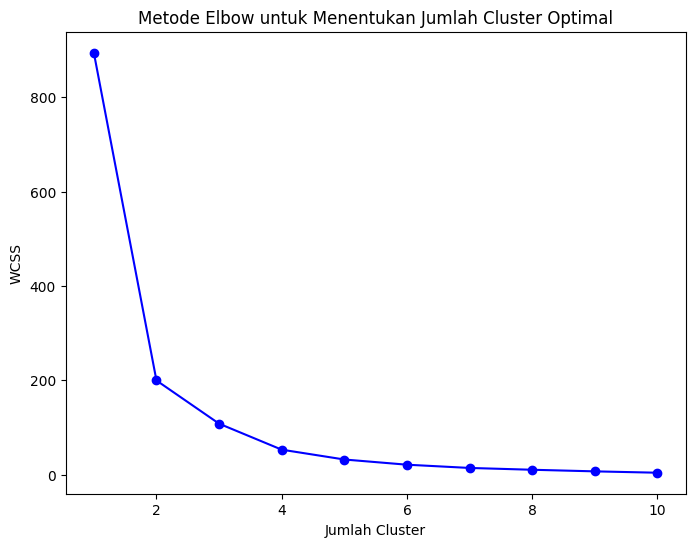

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [24]:
df['Cluster'] = kmeans.fit_predict(df[['Raport']])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    min_value = cluster_data['Raport'].min()  # Nilai minimum
    max_value = cluster_data['Raport'].max()  # Nilai maksimum
    print(f"Cluster {cluster + 1}: Rentang Nilai = {min_value} - {max_value}")

Cluster 1: Rentang Nilai = 67 - 70
Cluster 2: Rentang Nilai = 78 - 83
Cluster 3: Rentang Nilai = 64 - 66
Cluster 4: Rentang Nilai = 71 - 76


In [27]:
df['Cluster'] = kmeans.fit_predict(df[['Raport']])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
def kategori_pemahaman(cluster):
    if cluster == 0:
        return 'Kurang Memahami'  # Cluster 3: Rentang Nilai = 64 - 66
    elif cluster == 1:
        return 'Cukup Faham'  # Cluster 1: Rentang Nilai = 67 - 70
    elif cluster == 2:
        return 'Baik'  # Cluster 4: Rentang Nilai = 71 - 76
    elif cluster == 3:
        return 'Sangat Faham' 

In [29]:
df['Kategori Pemahaman'] = df['Cluster'].apply(kategori_pemahaman)

In [31]:
print(df[['Nama', 'Raport', 'Cluster', 'Kategori Pemahaman']])

                            Nama  Raport  Cluster Kategori Pemahaman
0                ABDIEL AFDELINA      78        1        Cukup Faham
1            ADITYA PUTRA ARDANA      65        2               Baik
2                 AHMAD AL FAUZI      73        3       Sangat Faham
3                  AMZAR HAMIZAN      65        2               Baik
4           ANNISA YULIANTI AZRA      65        2               Baik
5             BERRY EDWARD IRZAL      68        0    Kurang Memahami
6           CHRISTIN MIRNA LAIYA      71        3       Sangat Faham
7         DEANFER ZEMORA TIMOTHY      78        1        Cukup Faham
8                 DEWI MAHA RANI      69        0    Kurang Memahami
9                 DINI RAMADHANY      78        1        Cukup Faham
10                 FADITYA ILHAM      69        0    Kurang Memahami
11                FIERMADY SITIO      64        2               Baik
12  FITYA AFIFA SYAKIRA RUSWANDI      73        3       Sangat Faham
13                  FRANCESCA WU  

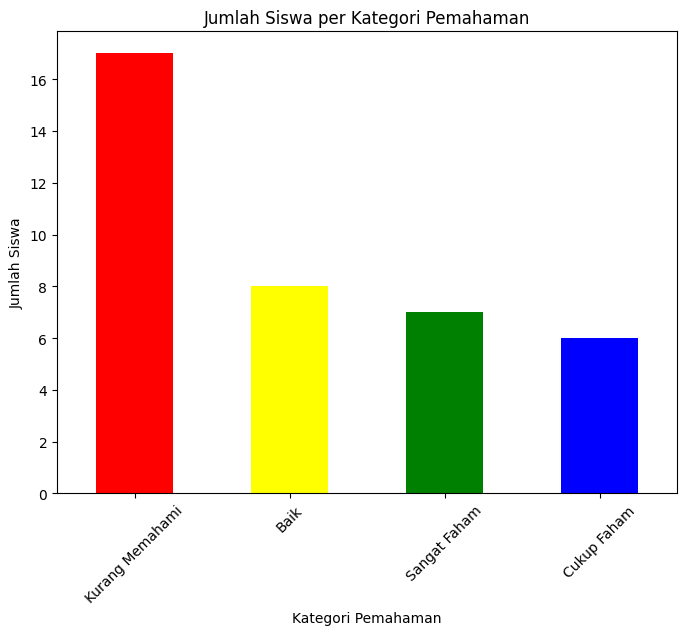

In [32]:
plt.figure(figsize=(8,6))
kategori_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'blue'])
plt.title('Jumlah Siswa per Kategori Pemahaman')
plt.xlabel('Kategori Pemahaman')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=45)
plt.show()